<img src="images/Strawberry_Creek.png" style="width: 400px;"/>

Welcome! Throughout this lab you will use R to analyze the data collected from the North and South Forks of Strawberry Creek. R is a general-purpose programming language that allows one to use data analysis methods to answer questions about data. In this part of the lab we will apply statistical methods to the biological metrics data to determine whether or not the water quality (or ecological health) of the two forks of Strawberry Creek is significantly different.

# 1. Jupyter Notebooks <a id="1"></a>

---


This portion of the lab is set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of cells. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.

### Types of cells <a id= '1.1'> </a>
    
There are two types of cells in Jupyter, code cells and markdown cells. Code cells are cells indicated with “In [ ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell. Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.


### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:

press Shift + Enter
click Cell -> Run Cells in the toolbar at the top of the screen.
You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens.

In [1]:
print("Hello, World")

[1] "Hello, World"


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Submitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting your work into a PDF file and then including it in your Lab Report

Learning Outcomes

By the end of this notebook and accompanying lab, students should be able to:

Explain the use of biological organisms as indicators of ecosystem health.
Interpret biological metrics of diversity: taxon richness, %EPT, biotic index (FBI), % filterers, % predators, Shannon index.
Understand how to construct a Null and Alternative Hypothesis.
Use randomization to determine if two distributions are different.
Interpret a p-value to describe statistical significance.

Run this cell before proceeding with the rest of the lab!

In [2]:
install.packages(c("dplyr", "tidyr", "googlesheets4", "ggplot2", "reshape2"))

Installing packages into ‘/srv/r’
(as ‘lib’ is unspecified)



In [3]:
# Load necessary packages!
library(dplyr)
library(tidyr)
library(googlesheets4)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




<br><br><br><br>

# 2. Importing the Data <a id='2'> </a>
---

Today, we'll be using a set of data that were previously collected from Strawberry Creek and entered into a spreadsheet saved in the csv format. To import the data set just run the following cell! If all goes smoothly, you will see the first few rows of your data file.

In [4]:
# Run this cell to load the data. You will see the first 6 rows of the dataset below the cell

gs4_deauth() # This will work for a google sheets where anyone with a link can view. 

sheet_url = "https://docs.google.com/spreadsheets/d/11P9IKEIBGcPffTsTrGuINXSwM8NTaGaFZHmzpUJgZxQ/edit?usp=sharing"

# Read the worksheet
straw_creek_data = read_sheet(sheet_url, sheet = "Sheet1") #Can change the specific sheet to whatever

head(straw_creek_data)

✔ Reading from bio test.

✔ Range ''Sheet1''.



Site,Section,Fork,Restoration (Y/N),Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,111,South,Y,0,25.0,75.0,87.5,62.5,0,75,37.5
F,111,South,Y,100,75.0,50.0,63.0,63.0,0,75,63.0
G,111,South,N,75,0.0,0.0,70.0,50.0,0,30,35.0
H,111,South,N,0,100.0,50.0,87.5,52.5,0,25,50.0
I,111,South,N,0,50.0,0.0,25.0,37.5,0,75,37.5
K,111,South,N,35,33.3,12.5,62.5,62.5,0,75,75.0


<br>

# 3. Introduction to Data Analytics <a id= '3'> </a>
---

## Null Hypothesis vs. Alternative Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance. In this lab we are trying to determine whether or not the difference between communities of organisms in the two forks of the creek are different from one another or not. If we determine that our samples are more different than is expected by chance, then we can say that the difference is significant and conclude that our samples represent real differences in the communities of macroinvertebrates. 

To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

>__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two samples and that any difference is due to experimental error, measurement error, or chance.

>__Alternative Hypothesis__: An alternative hypothesis states that the difference in samples is meaningful, or significant.

**Example Null and Alternative Hypothesis**


Say we have a data set with samples of the number of boba shops on Southside and Northside. The data set shows that Southside has a higher average of boba shops than Northside, but it is unclear whether the difference in the average is due to chance or some other unknown reason. For this data set, potential hypotheses would be:

>__Example Null Hypothesis__
- The distribution of the average number of boba shops is the same for the samples taken from Southside as the samples taken from Northside. The difference in sample distribution is due to chance. 

>__Example Alternative Hypothesis__  
- The average number of boba shops in samples from Southside is lower than the average number of boba shops in samples from Northside.


## Discussion Questions -- NEEDS UPDATED!!!!!!!!!!!!!!!

<!-- BEGIN QUESTION --> 
**Question 1a**

**What is your null hypothesis with regard to the relative water quality of the north and south fork of Strawberry Creek?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 1b**

**What is your alternative hypothesis?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<!-- END QUESTION --> 
After you have your null and alternative hypothesis, the next step is to simulate the distribution under the null hypothesis! Theoretically, if the differences in distributions were solely due to random chance, then the data that the distribution originally comes from would be the same. This is where randomization tests come in to play.

## Header???

The Riparian Rapid Assessment Method (RipRAM) Index Score is a metric used to evaluate the overall health of a riparian area along a stream or river. It is an average of the X metrics you collected during the last lab. 

Let's start with using every metric to test the total health of Strawberry Creek! The first couple of columns for the class data are site information. The remaining columns are the numeric values you collected in the field. We are going to average those values to get a total Index Score (the total health of the stream) based on all of the values. 

In [5]:
# Find the columns that have the word "Metric" in the header
metric_cols = grep("Metric", names(straw_creek_data), value = TRUE) 

# Calculate Index Score as the average across metrics
straw_creek_data$"Index Score" = rowMeans(straw_creek_data[, metric_cols]) 

head(straw_creek_data)

Site,Section,Fork,Restoration (Y/N),Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Index Score
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E,111,South,Y,0,25.0,75.0,87.5,62.5,0,75,37.5,45.3125
F,111,South,Y,100,75.0,50.0,63.0,63.0,0,75,63.0,61.1250
G,111,South,N,75,0.0,0.0,70.0,50.0,0,30,35.0,32.5000
H,111,South,N,0,100.0,50.0,87.5,52.5,0,25,50.0,45.6250
I,111,South,N,0,50.0,0.0,25.0,37.5,0,75,37.5,28.1250
K,111,South,N,35,33.3,12.5,62.5,62.5,0,75,75.0,44.4750


## N/S Fork

The North fork and the South fork of Strawberry Creek run through different ... some paragraph description. 

One of the important questions regarding this creek is how healthy the North fork is compared to the South fork. 

In the following cell, type in which "X VARIABLE" you which to examine across both the N and the S forks. If you type "All", you will get a comparision between metrics (INSERT GRAPH BROKEN UP BY THE NUMBER OF INPUTS)

In [6]:
# Look at all metrics and subdivide by N and S forks
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]


# Subset for N and S forks
N_data = straw_creek_data[straw_creek_data$Fork == "North", c("Site", metric_cols)]
N_data$Fork_Label = "North"

S_data = straw_creek_data[straw_creek_data$Fork == "South", c("Site", metric_cols)]
S_data$Fork_Label = "South"


# View results for North and South Fork seperatley
N_data
S_data

Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Fork_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E,32,32.0,75.0,3,62.5,0,75,37.5,North
F,100,54.0,50.0,2,63.0,0,75,63.0,North
G,75,0.0,7.0,6,50.0,0,30,35.0,North
H,0,100.0,50.0,65,44.0,0,25,50.0,North
I,0,50.0,0.0,2,54.0,0,75,37.5,North
K,45,33.3,12.5,56,62.5,0,75,75.0,North
L,23,75.0,23.0,50,37.5,0,75,37.5,North


Site,Metric 1: Total Vegetation Cover,Metric 2: Vegetation Structure,Metric 3: Vegetation Quality,Metric 4: Age Diversity,Metric 5: Riparian Vegetation Width,Metric 6: Riparian Soil Condition,Metric 7: Macroinvertebrate Habitat Patch Richness,Metric 8: Anthropogenic Altertations,Fork_Label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E,0,25.0,75.0,87.5,62.5,0,75,37.5,South
F,100,75.0,50.0,63.0,63.0,0,75,63.0,South
G,75,0.0,0.0,70.0,50.0,0,30,35.0,South
H,0,100.0,50.0,87.5,52.5,0,25,50.0,South
I,0,50.0,0.0,25.0,37.5,0,75,37.5,South
K,35,33.3,12.5,62.5,62.5,0,75,75.0,South
L,23,75.0,0.0,50.0,37.5,0,75,37.5,South


In [7]:
## Now lets average the Index Score for each fork. 

# Create Index Score for North
N_data$`Index Score` = rowMeans(N_data[, metric_cols])

# Create Index Score for South
S_data$`Index Score` = rowMeans(S_data[, metric_cols])

# Compute average Index Score per fork
N_mean_index = mean(N_data$`Index Score`)
S_mean_index = mean(S_data$`Index Score`)

# View results
cat("North Mean Index Score:", N_mean_index, "\n")
cat("South Mean Index Score:", S_mean_index, "\n")

North Mean Index Score: 38.56786 
South Mean Index Score: 42.05893 


## Major Restoration? 

## WHAT DO WE WANT TO DO HERE?

## Individual Metric analysis

Now, it's up to you. Choose what metrics you would like! In the next cell, type in which metrics you would like to look at. NEED TO FIX

In [8]:
## Write whih metrics you would like to look at here: 
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols = names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]

straw_creek_data_long <- melt(
  straw_creek_data,
  id.vars = c("Site", "Fork"),
  measure.vars = metric_cols,
  variable.name = "Metric",
  value.name = "Score"
)


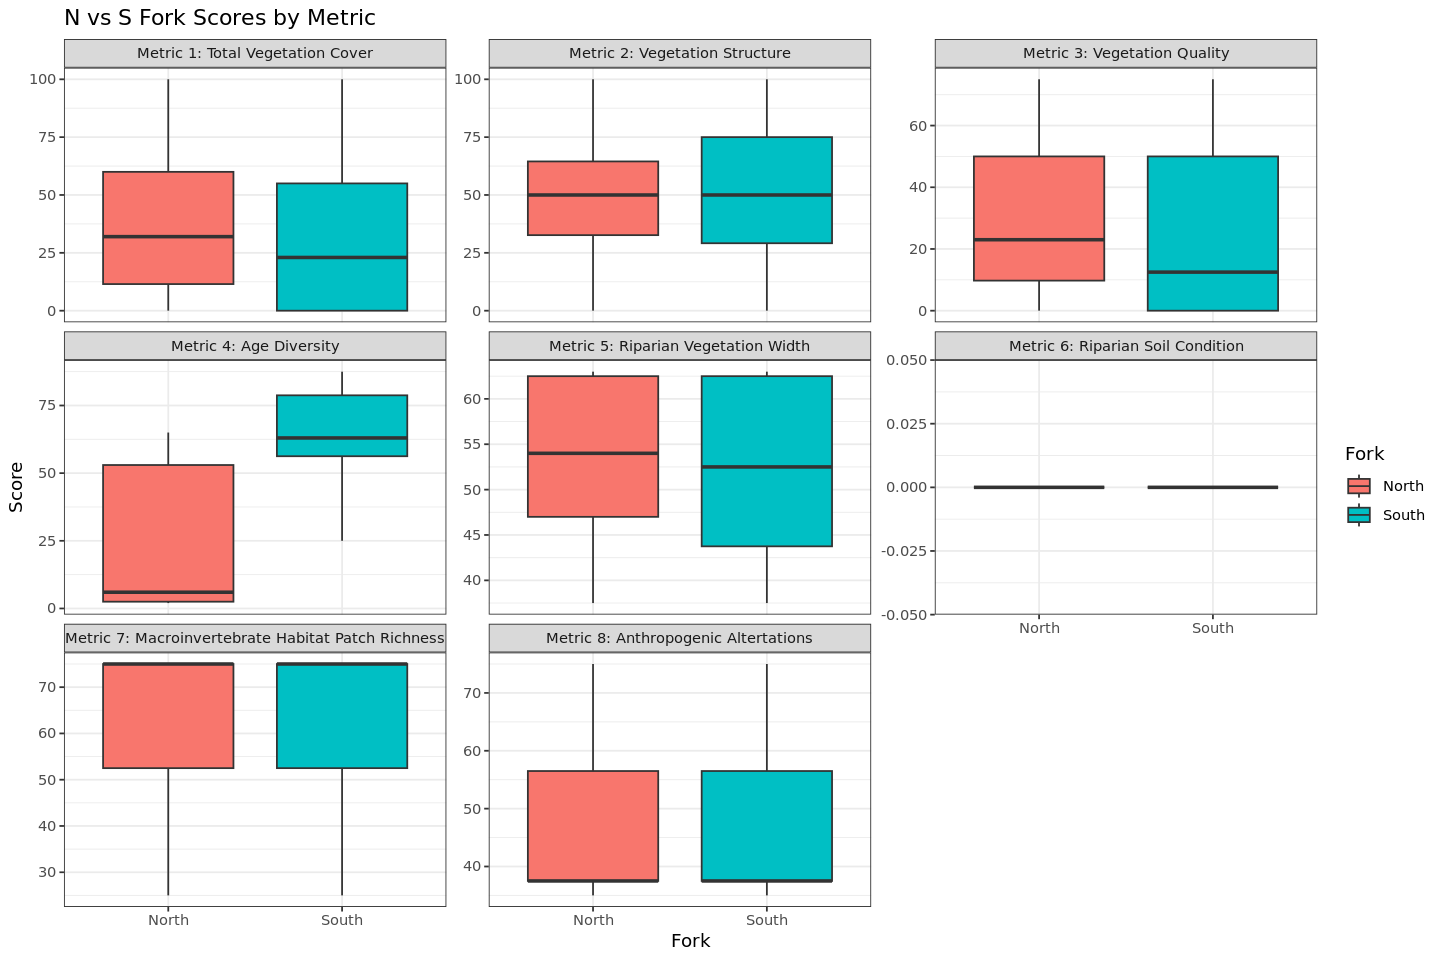

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8) #Change the plot size

ggplot(straw_creek_data_long, aes(x = Fork, y = Score, fill = Fork)) +
  geom_boxplot() +
  facet_wrap(~ Metric, scales = "free_y") +
  labs(
    title = "N vs S Fork Scores by Metric",
    x = "Fork",
    y = "Score"
  ) +
  theme_bw()

## RANDOMIZATION TEST -- IS THIS FOR EACH METRIC? OR JUST THE INDEX SCORE PER SITE?

A randomization test __shuffles a data set among categories and creates new distributions__. In this case, we are using a randomization test to shuffle the difference in ecological health of the two creeks. As was previously mentioned, a randomization test simulates the null hypothesis because it assumes that there is no significant difference between the distributions. 

To demonstrate, we will run randomization testing on example data of a biotic index (FBI scores) collected from the North and South Fork in order to understand the process. You will analyze your own data after this.

Run the following code below to enter the example data and see it displayed in a data frame.

In [11]:
example = data.frame(
  `FBI_Score` = c(3.5, 4.0, 3.0, 3.5, 4.2, 4.5, 5.0, 3.6, 4.9, 5.1, 3.4, 2.9),
  'Fork' = c(rep("North", 5), rep("South", 7))
)
#example$FBI_Score <- as.numeric(example$FBI_Score)

example

FBI_Score,Fork
<dbl>,<chr>
3.5,North
4.0,North
3.0,North
3.5,North
4.2,North
4.5,South
5.0,South
3.6,South
4.9,South


Here, we see each row of the dataset represents an FBI Score for a specific Fork, either North or South.

With the data, we can compare the North and South Fork by calculating the difference between the means of each Fork. Run the cell below to see the observed difference in FBI means between the two samples.

In [12]:
# Calculate observed difference between means between forks
observed_difference = abs(
  mean(example$FBI_Score[example$Fork == "North"]) -  mean(example$FBI_Score[example$Fork == "South"])
)

observed_difference

[1] 0.56

We call this our observed difference because this statistic is observed from data that was actually collected.

To illustrate how we find the observed difference, we plot the distribution of FBI scores for each Fork. For each distribution, we plot its mean. Notice that subtracting the two means results in our observed difference from above.

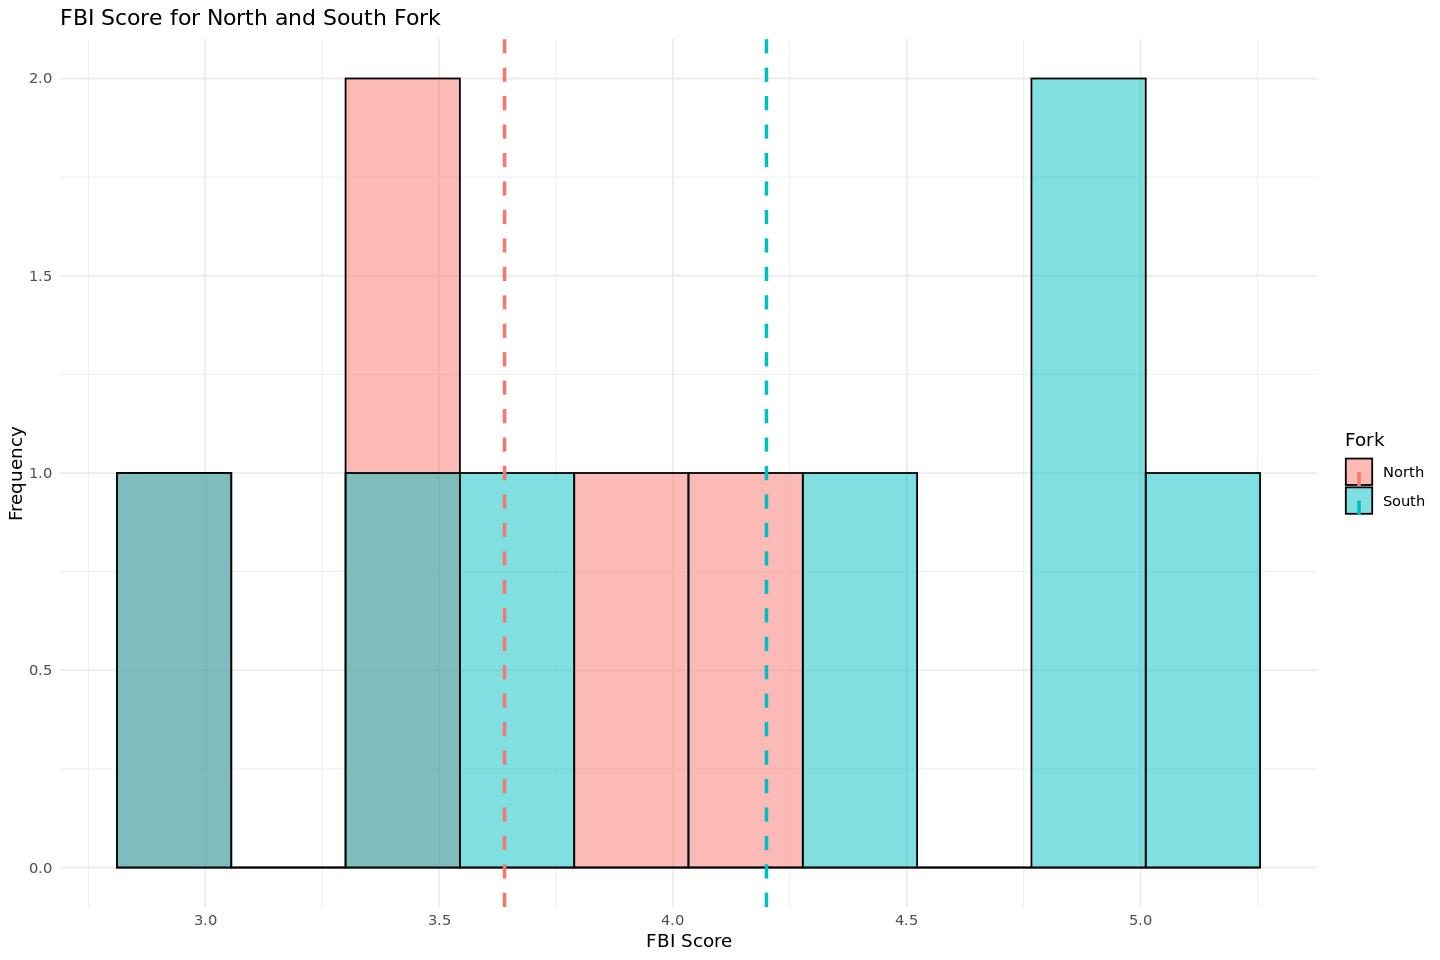

In [13]:

ggplot(example, aes(x = `FBI_Score`, fill = Fork)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 10, color = "black") +
  
  # Add vertical lines for group means
  geom_vline(
    data = aggregate(`FBI_Score` ~ Fork, data = example, mean),
    aes(xintercept = `FBI_Score`, color = Fork),
    linetype = "dashed",
    linewidth = 1
  ) +
  
  labs(
    x = "FBI Score",
    y = "Frequency",
    title = "FBI Score for North and South Fork",
    fill = "Fork",
    color = "Fork"
  ) +
  theme_minimal()

In randomization testing, the data points are 'shuffled' between the two forks. That is, the analysis takes data from the North Fork and the South Fork and creates a new data set by placing the data into new North and South Fork data sets randomly. In this way we can test how likely it is to obtain the observed differences between the North and South fork by chance alone.

For one randomization, we will calculate the FBI Score means for each fork. In this case, the mean difference is no longer an observed difference but a simulated difference. Run the cells below to generate a randomization of the data and to calculate the new difference.

In [14]:
perm_example = data.frame(
  `FBI_Score` = sample(example$`FBI_Score`, size = nrow(example)),  # random shuffling
  Fork = c(rep("North", 5), rep("South", 7))
)

perm_example

FBI_Score,Fork
<dbl>,<chr>
5.0,North
3.6,North
4.9,North
3.0,North
5.1,North
2.9,South
3.4,South
3.5,South
4.5,South


In [15]:
perm_difference = abs(
  mean(perm_example$`FBI_Score`[perm_example$Fork == "North"]) - mean(perm_example$`FBI_Score`[perm_example$Fork == "South"])
)

perm_difference

[1] 0.6057143

This is just for one randomization of the data. We perform many randomization tests (about 1000 of them) and with these values we can plot the distribution of differences of means. Using this distribution of simulated differences, we can compare it with our actual observed difference to see how likely it is to observe this difference and if our null hypothesis is true.

In [16]:
# Function to compute absolute difference in means
difference_in_means = function(df) {
  abs(mean(df$`FBI_Score`[df$Fork == "North"]) - mean(df$`FBI_Score`[df$Fork == "South"]))
}

# Number of permutations
n_repeats = 1000
permutation_differences = numeric(n_repeats)

# Run permutation test

for (i in 1:n_repeats) {
  # Shuffle FBI Scores
  shuffled_scores = sample(example$`FBI_Score`)
  
  perm_df = data.frame(
    `FBI_Score` = shuffled_scores,
    Fork = example$Fork
  )
  
  # Compute difference in means
  permutation_differences[i] = difference_in_means(perm_df)
}

# Inspect results
head(permutation_differences)

[1] 0.05714286 0.21714286 0.18285714 0.60571429 0.74285714 0.57142857

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


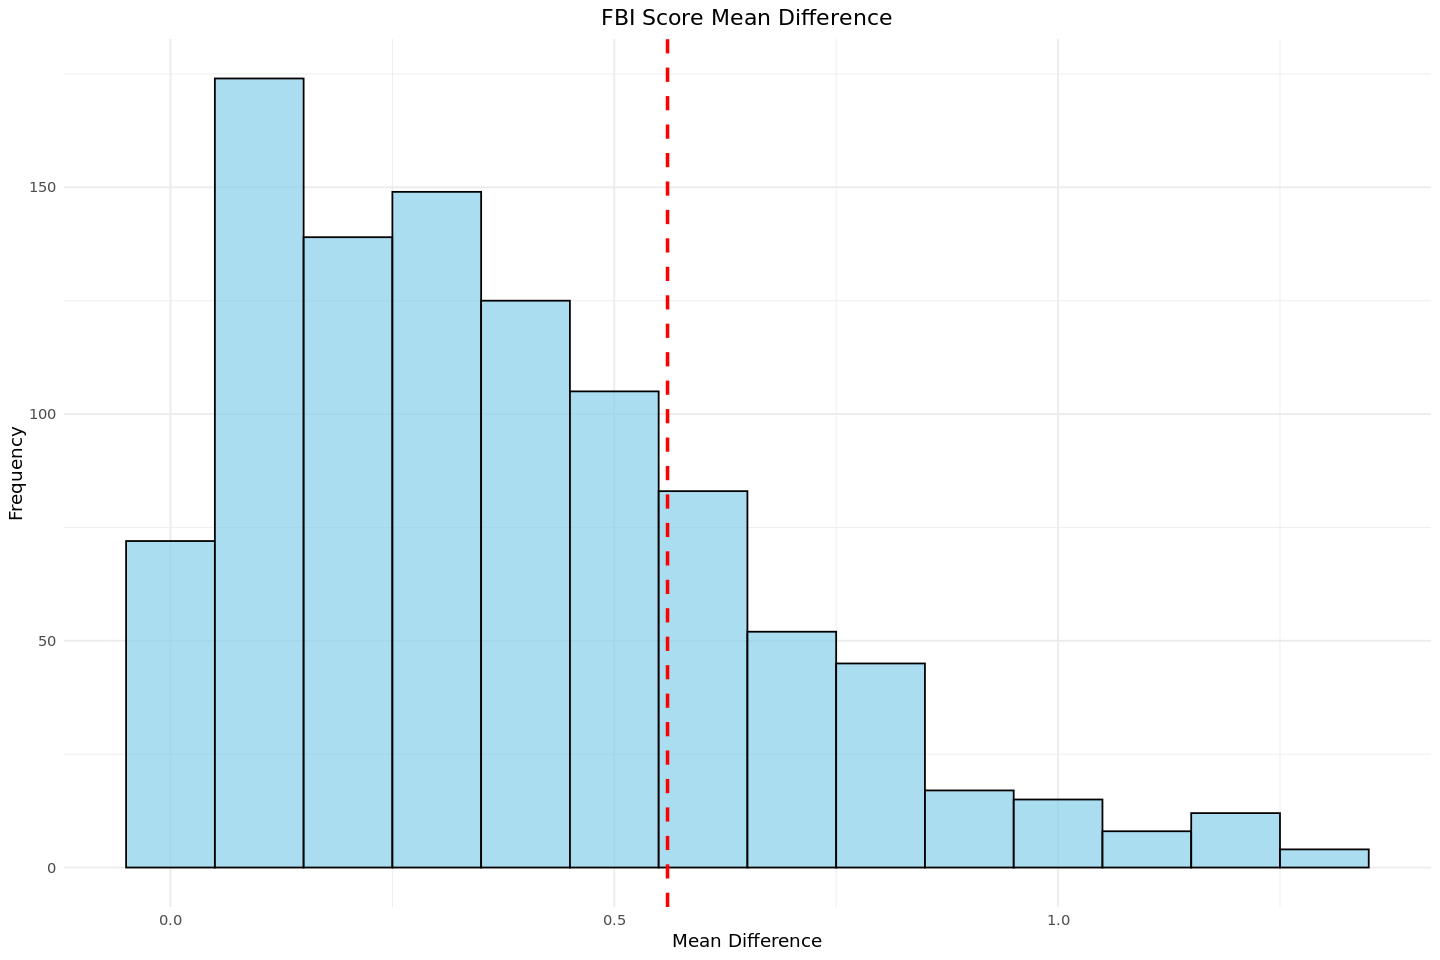

In [17]:
# Create a data frame for plotting
perm_df = data.frame(Difference = permutation_differences)

# Plot histogram with observed difference line
ggplot(perm_df, aes(x = Difference)) +
  geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = observed_difference), 
             color = "red", linetype = "dashed", size = 1) +
  labs(
    x = "Mean Difference",
    y = "Frequency",
    title = "FBI Score Mean Difference"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  # center the title

This chart shows a distribution of differences (e.g. mean of north fork samples - mean of south fork samples) for 1000 randomized simulations. We can see that most often the difference between the means are below 0.6. The mean from the observed data is indicated by the dashed red line.

Using this plot, we can guess if the null hypothesis is true (the observed difference between the two forks is due to random chance) or if the alternative hypothesis is true (that it is not due to chance alone).

## Discussion Question

<!-- BEGIN QUESTION --> 
<div class="alert alert-block alert-info">
    <p style=font-size:15px><b>Thought Question:</b> For the FBI metric, how likely is it for the observed difference to occur, and can we reject the null hypothesis?</p>
</div>

<!-- END QUESTION --> 
<br><br>

## P-Values & Statistical Significance <a id='3.3'> </a>

Now that we have a distribution of what the differences in FBI Scores generally look like, we can calculate the p-value to determine how probable it is for the observed_difference to occur. To calculate the p-value we count the number of times the difference is more extreme than the observed difference in the distribution and divide it by the total number of randomizations.

In [18]:
p_val_count = sum(permutation_differences > observed_difference) / length(permutation_differences)

p_val_count

[1] 0.225


If the p-value is small, it indicates that it is very unlikely for this result to occur and we say we “reject the null hypothesis”, meaning that the observed data likely represent an actual difference between the North and South Fork samples. Otherwise, if the p-value is large, it implies that the observed test statistic has a high likelihood of occurring and we say we “fail to reject the null hypothesis”.

A conventional cut-off for p-values is 0.05 or 5%. If the p-value is less than or equal to 5%, then the p-value is deemed “statistically significant”. Here, the p-value is larger than that. We will discuss p-values more in lab.

## Discussion Question

<!-- BEGIN QUESTION --> 
<div class="alert alert-block alert-info">
    <p style=font-size:15px><b>Thought Question:</b> Using the calculated p-value above, do we reject the null hypothesis or fail to reject the null hypothesis? Why?</p>
</div>

<!-- END QUESTION --> 
<br>

# 4. Your Data<a id='4'> </a>
---

Now, instead of using example data, you will use the data you imported and calculate the mean differences for each of the metrics you measured. Run the next cell for the observed differences between forks for each of the biological measures.

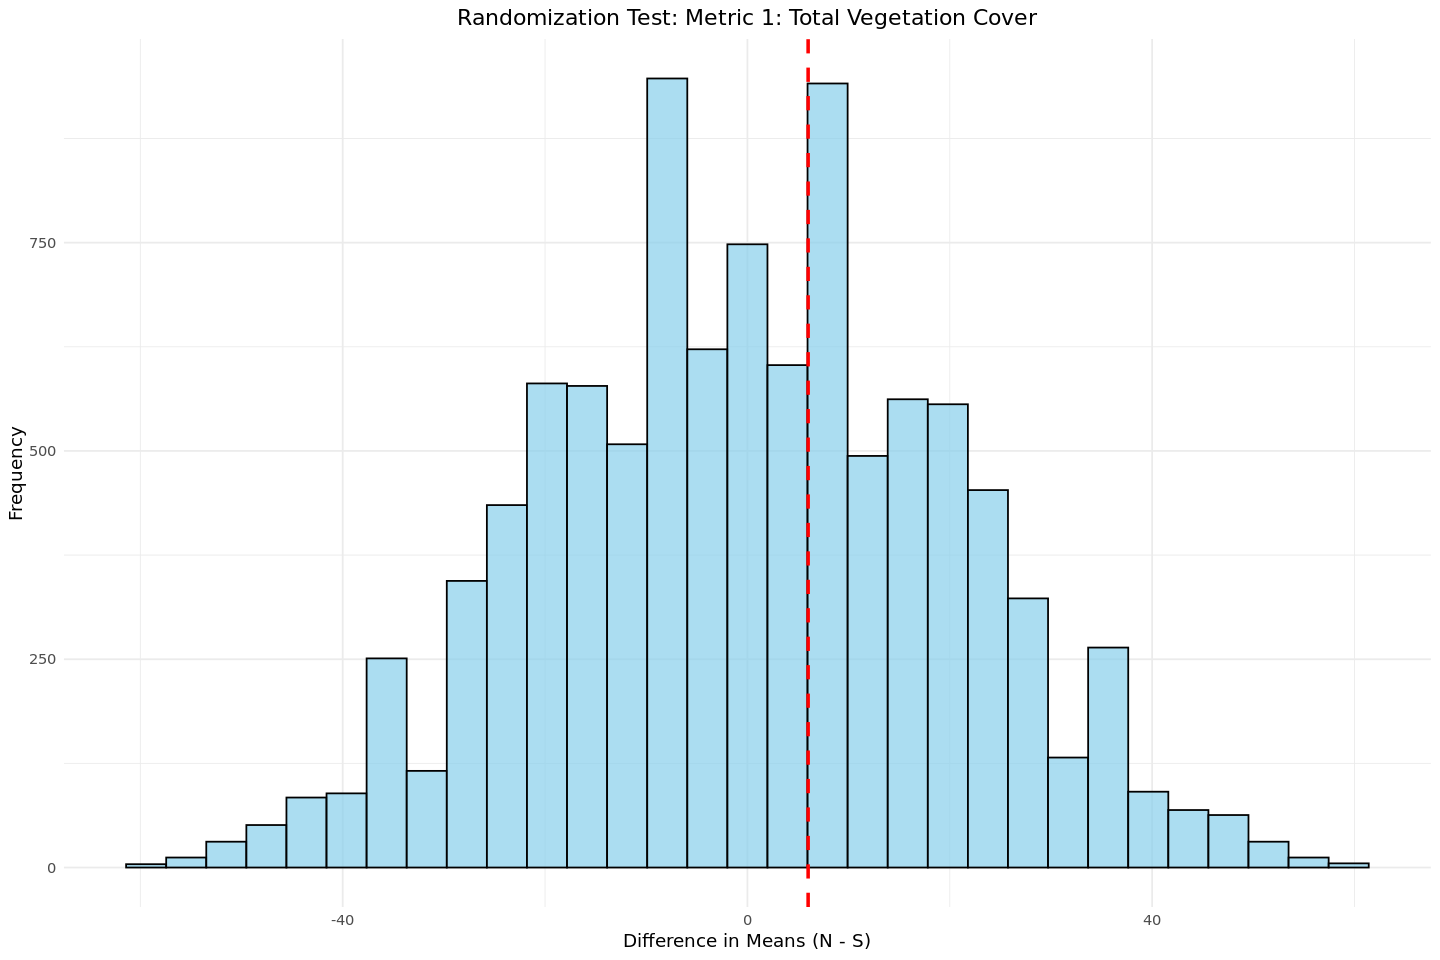

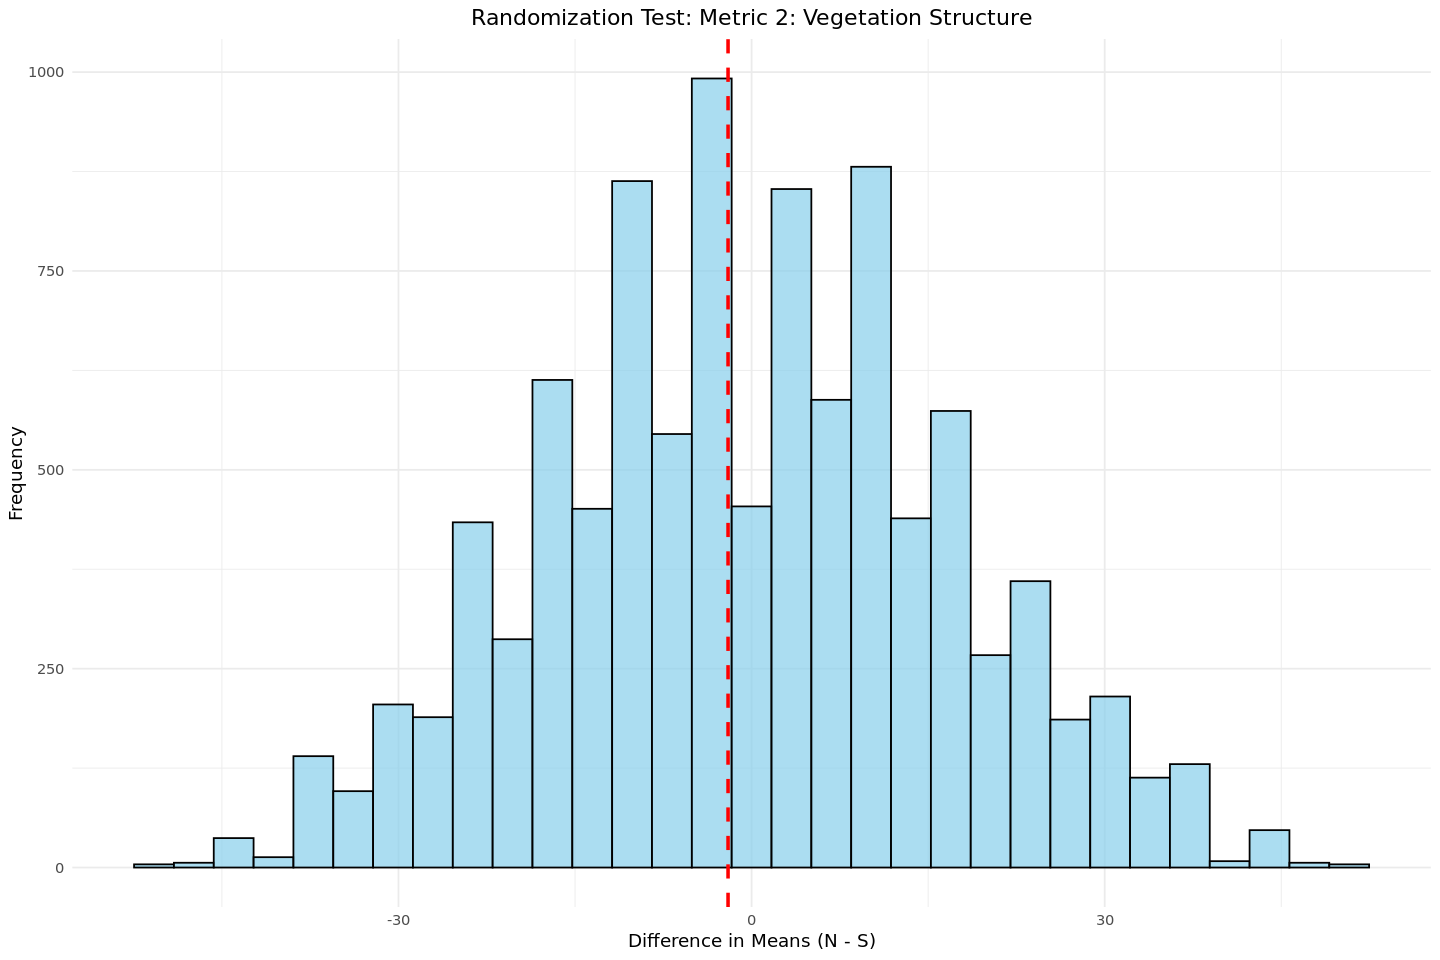

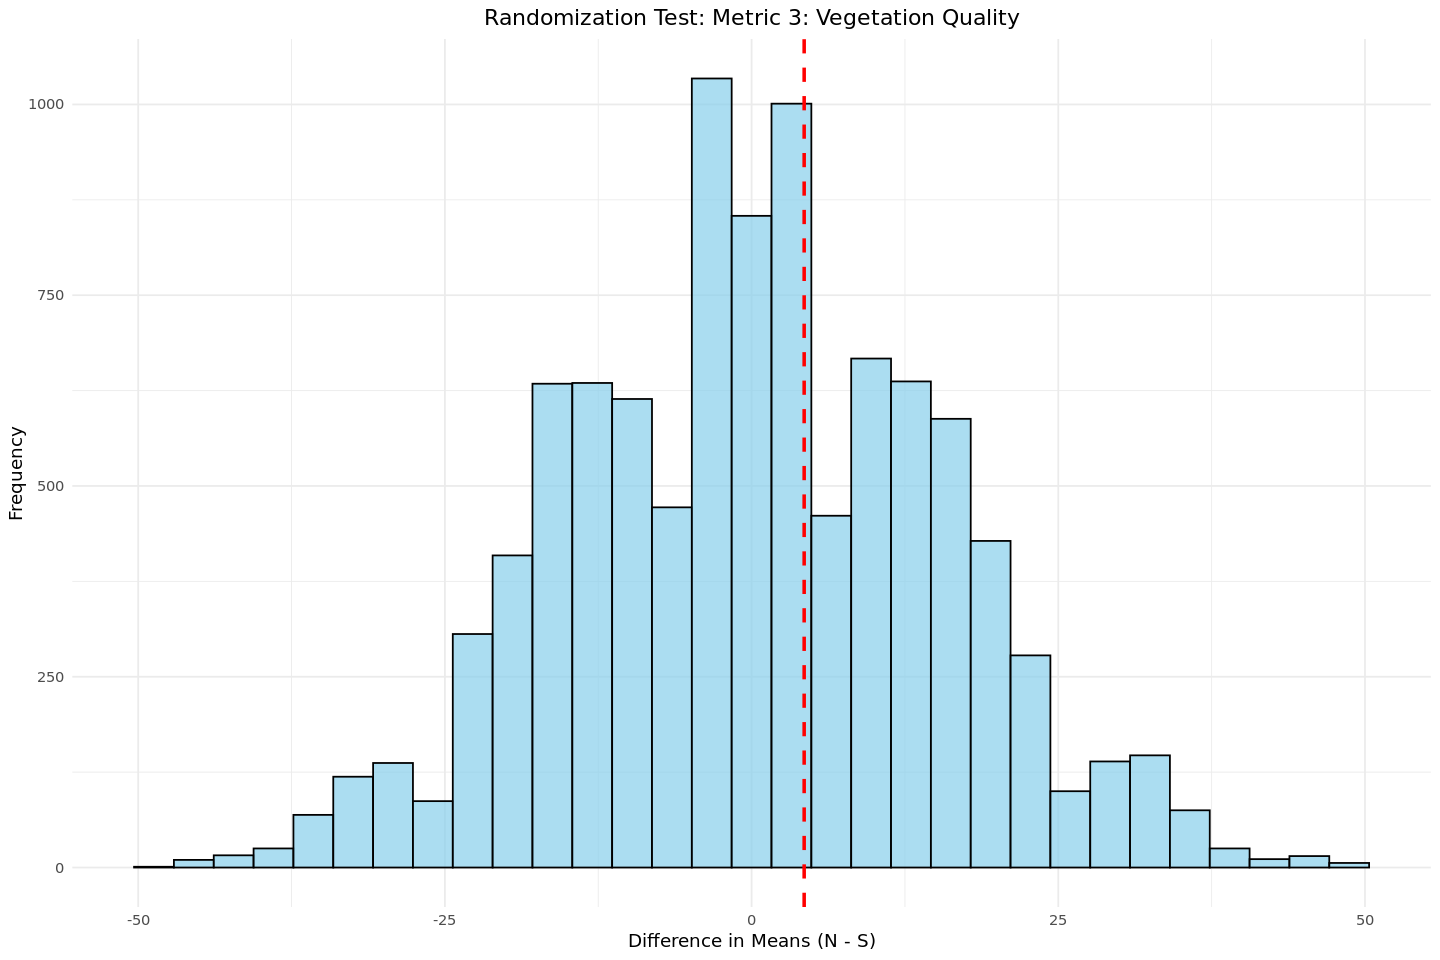

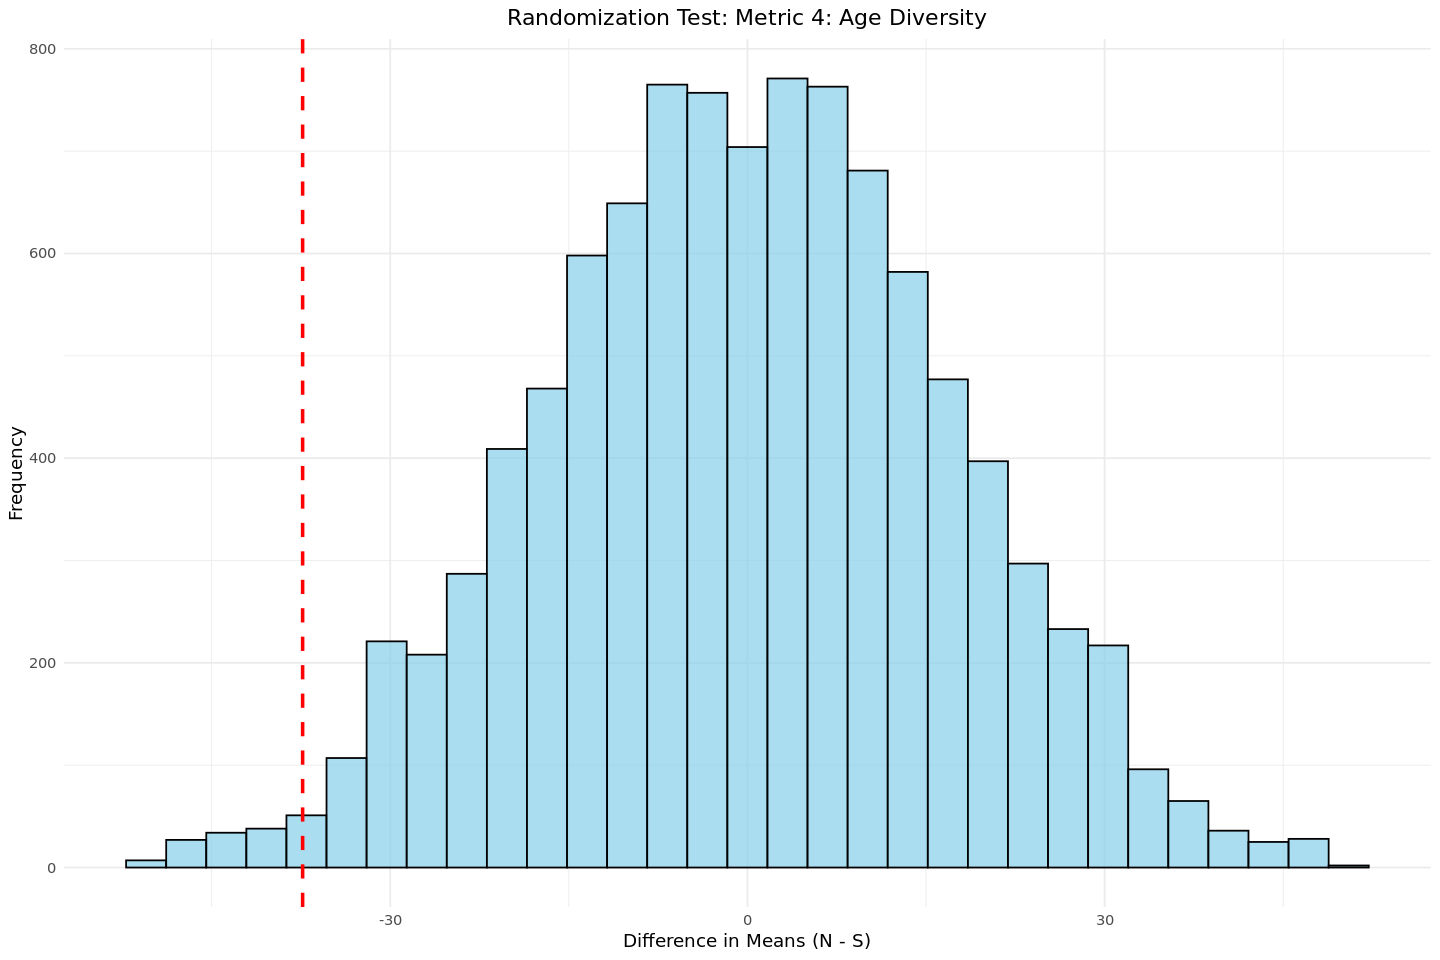

Warning message:
“Computation failed in `stat_bin()`.
Caused by error in `seq.default()`:
! 'from' must be a finite number”


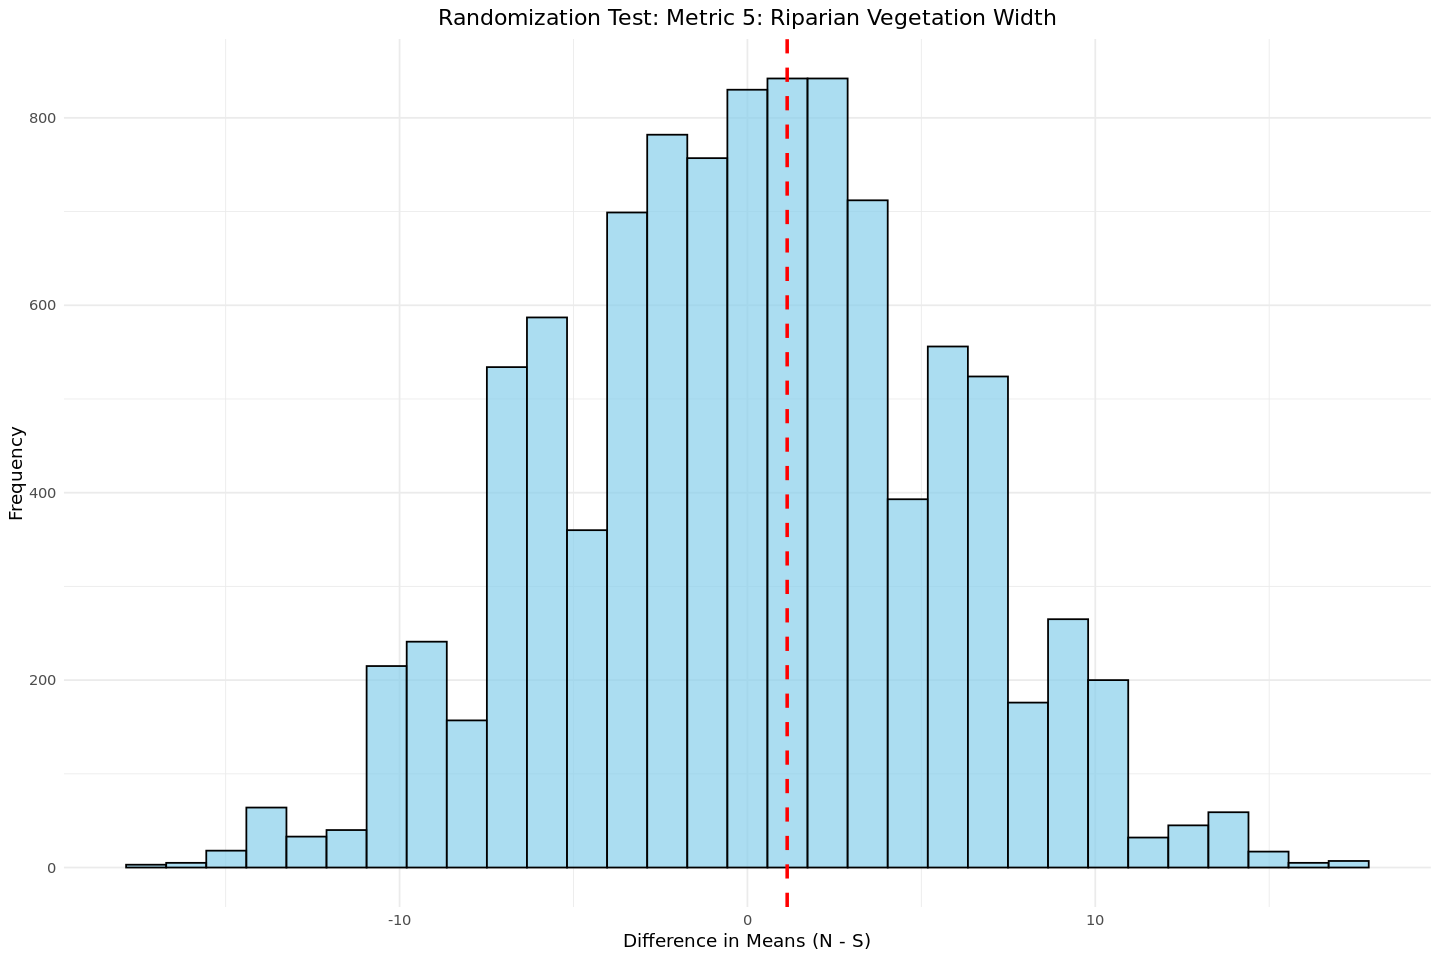

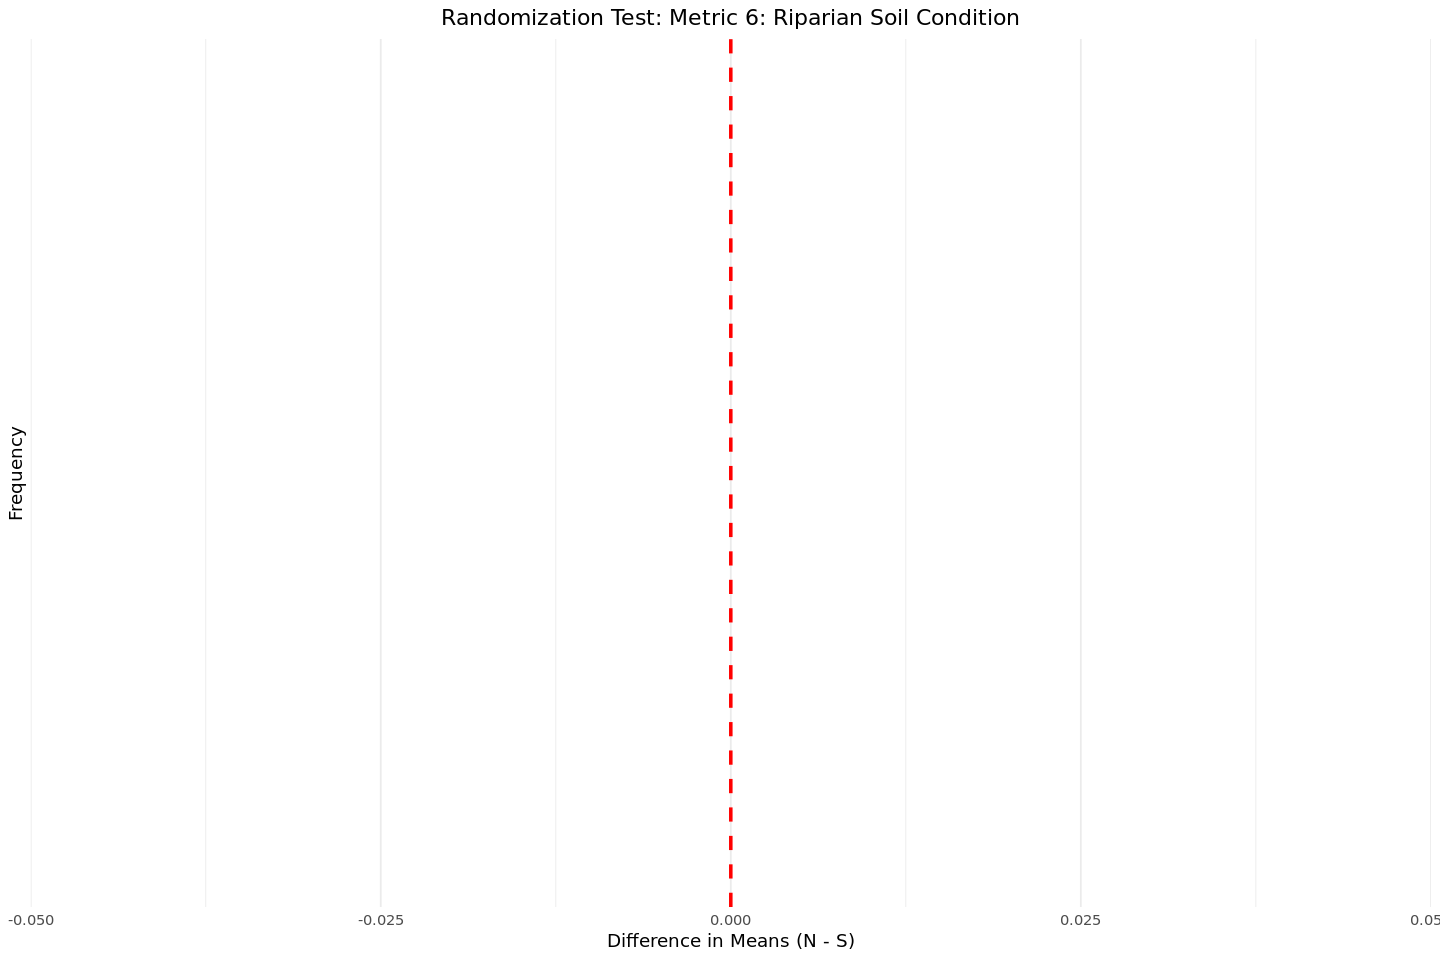

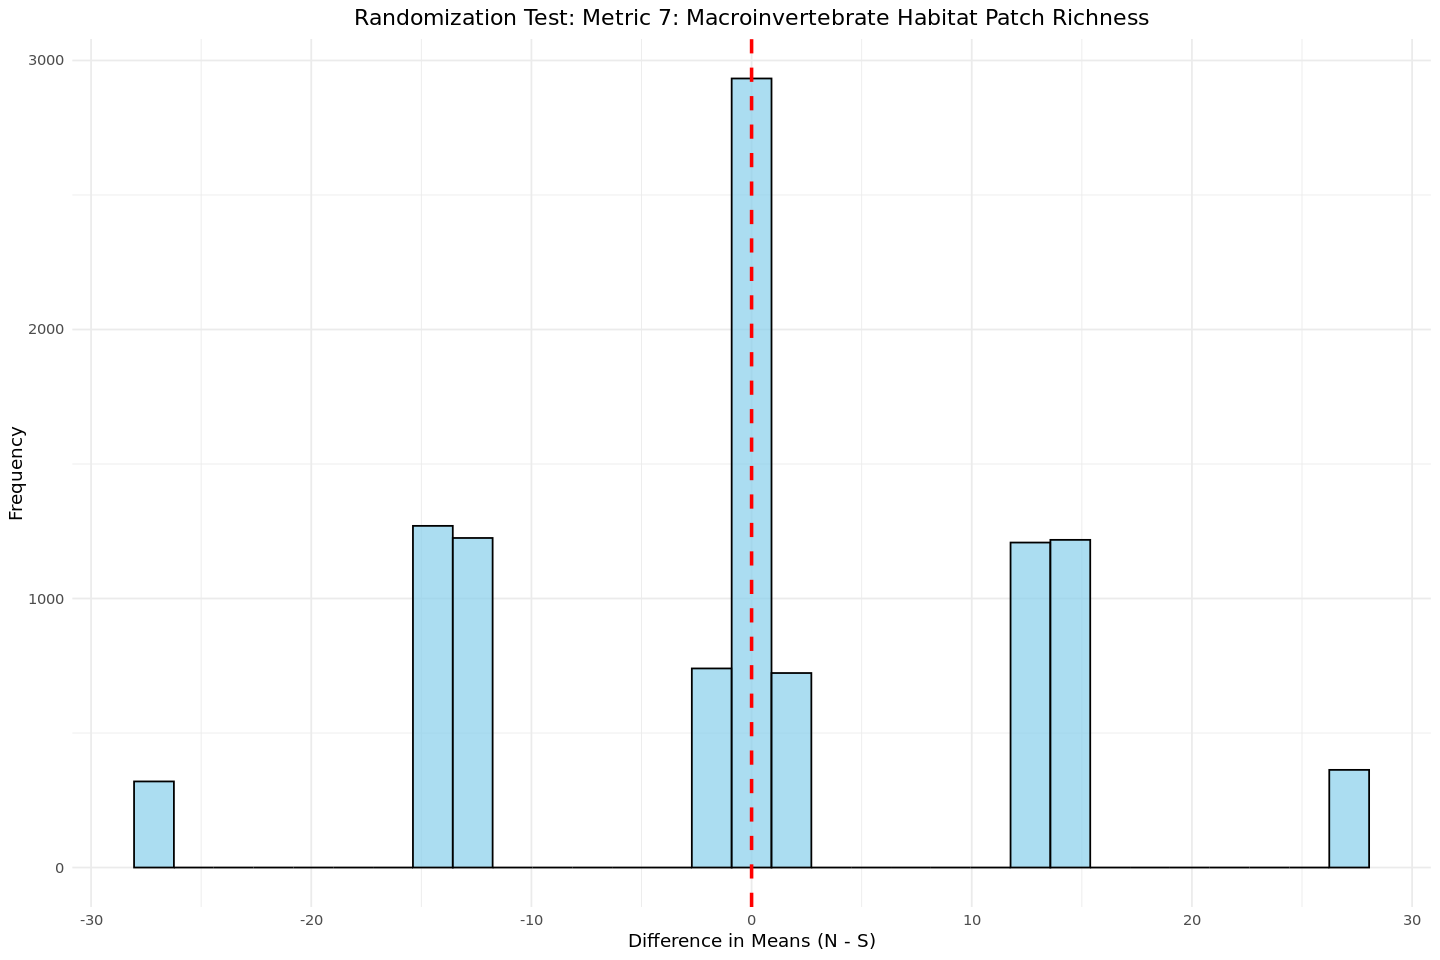

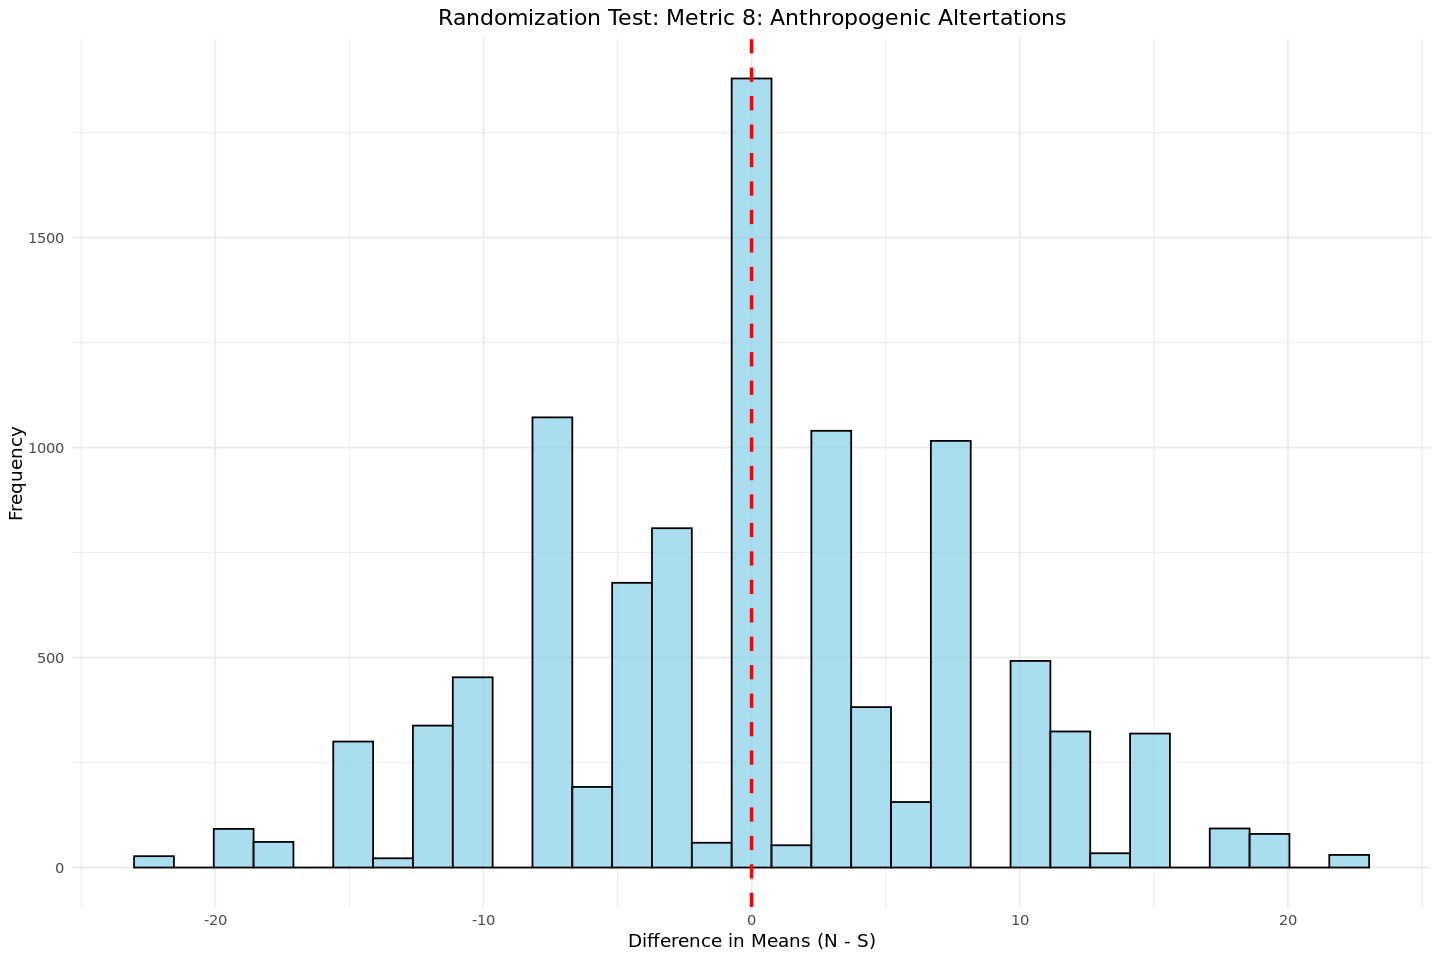

In [22]:
metric = c("Metric 1", "Metric 2", "Metric 3", "Metric 4", "Metric 5", "Metric 6", "Metric 7", "Metric 8")

# Combine them into one pattern (e.g., "Metric 1|Metric 2|Metric 3|...")
pattern = paste(metric, collapse = "|")

# Find all column names that contain those metrics
metric_cols =  names(straw_creek_data)[grepl(pattern, names(straw_creek_data))]

# Number of randomizations
n_perm = 10000

# Build a table to put results
results = data.frame(Metric = metric_cols, Observed_Diff = NA, P_Value = NA)

for (m in metric_cols) {

  # Compute observed difference
  obs_diff = mean(straw_creek_data[straw_creek_data$Fork == "North", m, drop = TRUE]) - mean(straw_creek_data[straw_creek_data$Fork == "South", m, drop = TRUE])
  
  # Run permutation test
  rand_diffs = replicate(n_perm, {
    permuted = sample(straw_creek_data$Fork)
    mean(straw_creek_data[permuted == "North", m, drop = TRUE]) - mean(straw_creek_data[permuted == "South", m, drop = TRUE],)
  })
  
  # Skip if all rand_diffs are NA (Shouldn't happen!! Check labels in cells)
  if (all(is.na(rand_diffs))) {
    warning(paste("Skipping", m, "- all permutation differences NA"))
    next
  }
  
# Compute p-value
p_val = mean(abs(rand_diffs) >= abs(obs_diff))
  
# Store results
results[results$Metric == m, c("Observed_Diff", "P_Value")] = c(obs_diff, p_val)
  
# ggplot histogram
  perm_df = data.frame(Difference = rand_diffs)
  
  p = ggplot(perm_df, aes(x = Difference)) +
    geom_histogram(binwidth = diff(range(rand_diffs)) / 30, 
                   fill = "skyblue", color = "black", alpha = 0.7) +
    geom_vline(xintercept = obs_diff, color = "red", linetype = "dashed", size = 1) +
    labs(
      x = "Difference in Means (N - S)",
      y = "Frequency",
      title = paste("Randomization Test:", m)
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

 print(p)
}


In [23]:
# Run this to get a summary table of your results!

results

Metric,Observed_Diff,P_Value
<chr>,<dbl>,<dbl>
Metric 1: Total Vegetation Cover,6.000000,0.8027
Metric 2: Vegetation Structure,-2.000000,0.9546
Metric 3: Vegetation Quality,4.285714,0.8037
Metric 4: Age Diversity,-37.357143,0.0234
Metric 5: Riparian Vegetation Width,1.142857,0.8483
Metric 6: Riparian Soil Condition,0.000000,1.0000
Metric 7: Macroinvertebrate Habitat Patch Richness,0.000000,1.0000
Metric 8: Anthropogenic Altertations,0.000000,1.0000


## Discussion Questions

<!-- BEGIN QUESTION --> 
__Question 4a__

__For each of the options in the dropdown menu (FBI Index, Richness, %ETP, %Filters, %Predators and Shannon Index), explain what the histograms mean and why the histograms look the way they do.__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 4b**

__Do you see anything unusual about any of the histograms or are they consistent with your expectations and hypotheses?__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<!-- END QUESTION --> 
<br><br>

## Congratulations on completing the lab!

## Feedback Form

Please fill out [this form](https://forms.gle/AuDrBiJDDyP8ktzUA) to give us valuable feedback for later notebooks!

## Submitting Your Work

**Make sure that you've answered all the questions.**

You are now finished with this notebook!

1) Please run the following cell to generate a download link for your responses.

2) Save the result graphs for each metric in Section 4: Your Data:
 - **Right-click** on one set of graphs for each metric.
 - Click `Save Image As...` and Save the Image. Email these images to your group to include in your report.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply right click and choose `Save Link As...` to save a copy of your pdf onto your computer.

**Note:** If you made any changes to your responses and/or they are not reflected in your PDF, make sure to re-run all the cells. You can do this by going to the top and clicking `Cell >> Run All` and download your new PDF.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**